## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['pdf.use14corefonts'] = True

#### roots and global variables

In [3]:
root = './'
plots_root = root + 'Plots/'
datasets_root = root + 'Datasets/'
behavioural_data_root = root +  'behavioral_data/selected_data/' 

plots_path = ''
dataset_path = datasets_root + "fastText_FC.csv"

Loading words and non-words with zipf and predicted probabilities

In [4]:
word_nword_df = pd.read_csv(dataset_path,
                            header=None,
                            names =['string', 'freq',  'label', 'zipf',
                                    'category', 'word_prob', 'non_word_prob'])
word_nword_df.head()

,string,freq,label,zipf,category,word_prob,non_word_prob
0,thashbuckler,0,0,0.0,NW,2.327570e-03,0.997672
1,citad,0,0,0.0,NW,1.029650e-05,0.999990
2,recipus,0,0,0.0,NW,5.357853e-05,0.999946
3,imducted,0,0,0.0,NW,1.005859e-07,1.000000
4,suy,0,0,0.0,NW,9.614917e-06,0.999990


In [5]:
# Reading LDT Data
behavioural_df = pd.read_csv(behavioural_data_root + 'LDT_data.csv',
                             header=None,
                             names=['accuracy', 'rt', 'string', 'response',
                                    'participant', 'minRT', 'participant_id'])
# Merging  behavioral dataframe with word_nonword_df to have words and non-words data with behavioral data
behavioural_df = pd.merge(behavioural_df, word_nword_df, on='string',
                          how='left').dropna().reset_index(drop=True)
behavioural_df = behavioural_df.drop(["freq", "participant"], axis=1)

In [6]:
behavioural_df.head()

,accuracy,rt,string,response,minRT,participant_id,label,zipf,category,word_prob,non_word_prob
0,0,0.634,sypnotized,1,0.477,1,0.0,0.000000,NW,2.158638e-04,9.997842e-01
1,0,0.554,daybreek,1,0.477,1,0.0,0.000000,NW,1.139517e-03,9.988605e-01
2,1,0.523,stir,1,0.477,1,1.0,3.771841,HF,9.999996e-01,3.215479e-07
3,1,0.583,Holkes,0,0.477,1,0.0,0.000000,NW,2.196746e-09,9.999999e-01
4,1,0.645,vurtain,0,0.477,1,0.0,0.000000,NW,6.302656e-06,9.999936e-01


Predicted probabilities of words and non-words in different conditions in all trials
across participants

In [7]:
behavioural_df.groupby(['category']).agg({'word_prob': ['mean', 'std', 'count', 'max', 'min'],
                                          'non_word_prob': ['mean', 'std', 'count', 'max', 'min']})

word_prob                                          non_word_prob  \
              mean       std  count       max           min          mean   
category                                                                    
HF        0.995462  0.035447   7225  1.000000  5.168501e-03      0.004538   
LF        0.989826  0.062848   9707  1.000000  9.673266e-06      0.010174   
NW        0.005574  0.051638  19877  0.999992  1.054338e-13      0.994426   

                                                   
               std  count       max           min  
category                                           
HF        0.035447   7225  0.994831  1.144427e-12  
LF        0.062848   9707  0.999990  7.466082e-11  
NW        0.051638  19877  1.000000  7.606193e-06

RT and response description of words and non-words in different conditions in all trials
across participants

In [9]:
behavioural_df.groupby(['category']).agg({'rt': ['mean', 'std', 'max', 'min'],
                                          'response': ['mean', 'std']})

rt                          response          
              mean       std    max    min      mean       std
category                                                      
HF        0.694659  0.262579  2.991  0.201  0.942699  0.232433
LF        0.822732  0.322311  2.898  0.200  0.797466  0.401909
NW        0.847904  0.319605  2.995  0.200  0.118428  0.323123

In [10]:
words = behavioural_df.loc[behavioural_df['category']!='NW'].copy()
words['response'].replace([1, 0], ["Word", "Non Word"], inplace=True)

RT and Zipf relation in of all word trials

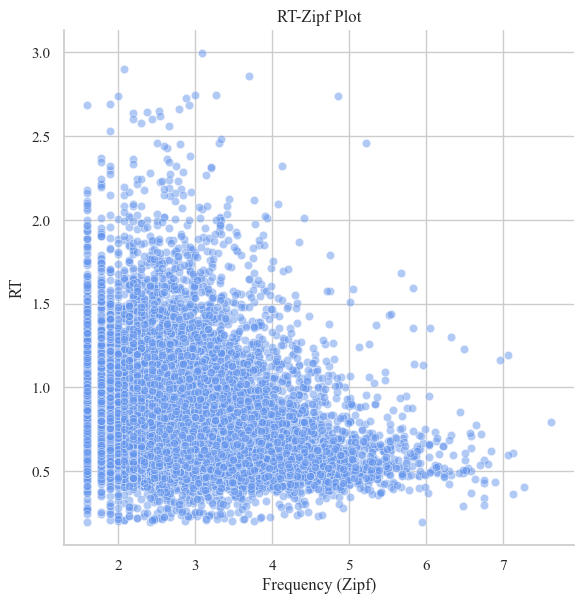

In [11]:
g = sns.relplot(x='zipf', y='rt', alpha=.5, height=6,
                data=words, color='cornflowerblue')
plt.title("RT-Zipf Plot")
g.set_xlabels("Frequency (Zipf)")
g.set_ylabels("RT")

RT and Zipf relation in all word trials for participants' word response and nonword response

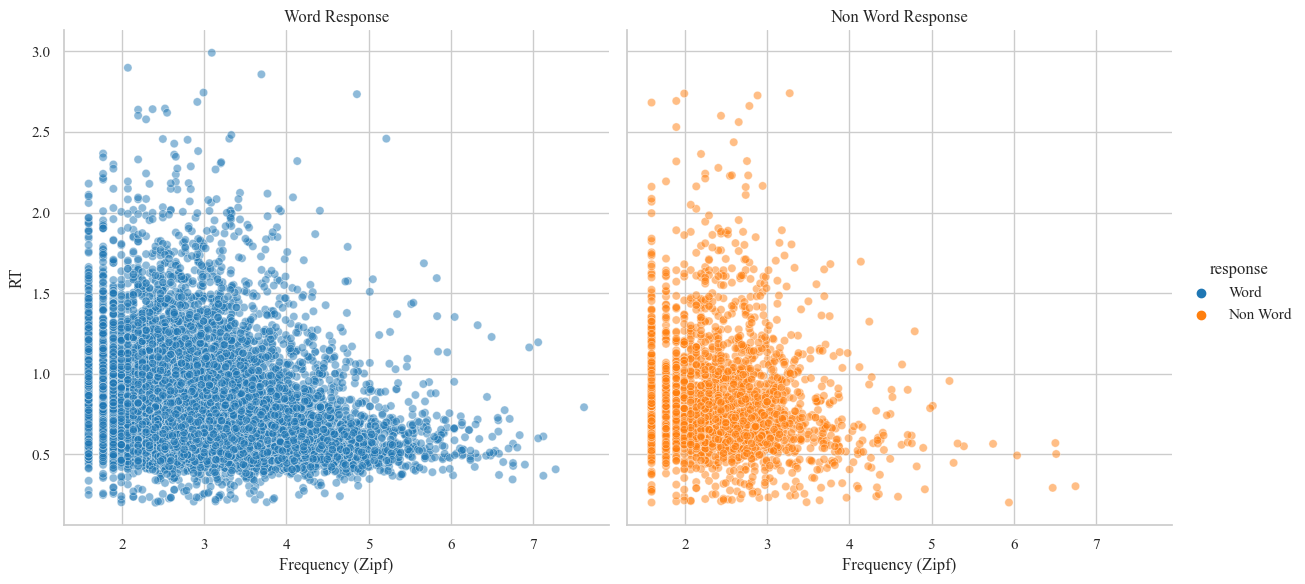

In [12]:
g = sns.relplot(x='zipf', y='rt', hue='response',
                col='response', alpha=.5, palette='tab10',
                height=6, data=words)

g.set_titles("{col_name} Response")
g.set_xlabels("Frequency (Zipf)")
g.set_ylabels("RT")

In [13]:
word_df = behavioural_df.loc[behavioural_df['category']!='NW']
mean_word = word_df.groupby(['participant_id']).agg({'rt': ['mean'], 'accuracy': ['mean'],
                                                                'response':['mean'], 'zipf':['mean']}).reset_index()
mean_word.columns = ['participant','rt', 'accuracy', 'response', 'zipf']

Mean RT and Mean Zipf relation for each participants

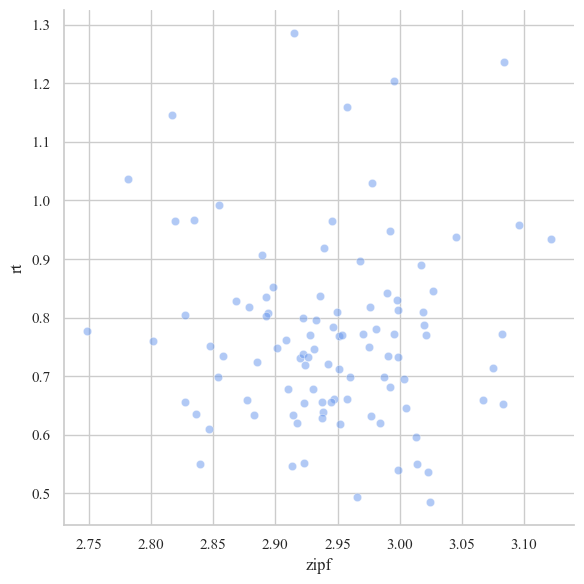

In [14]:
g = sns.relplot(x='zipf', y='rt', alpha=.5,
                height=6, data=mean_word,
                color='cornflowerblue')